In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#分别读入cifar-10数据集的训练集数据和测试集数据
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
print(x_train_image.shape)   #输出训练集数据大小
print(y_train_label.shape)   #输出训练集数据标签大小
print(x_test_image.shape)   #输出测试集数据大小
print(y_test_label.shape)   #输出测试集数据标签大小

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


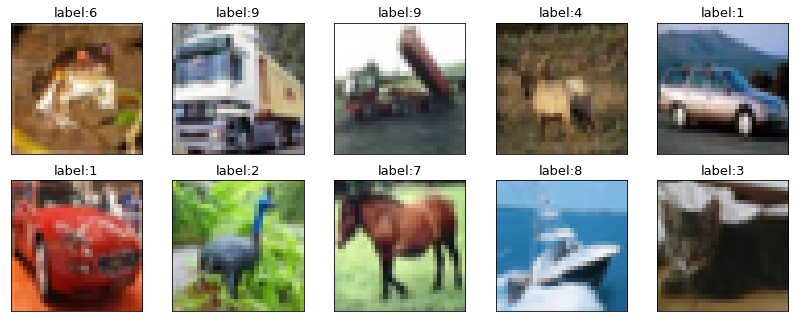

In [45]:
def plot_image(images,labels,prediction,index,nums=10):
    fig = plt.gcf() 
    fig.set_size_inches(14,14)   #设置图表大小
    for i in range(0,nums):
        ax = plt.subplot(5,5,1+i)   #子图生成
        ax.imshow(images[index])   #index是为了方便索引所要查询的图像
        title = 'label:' + str(labels[index][0])   #定义title方便图像结果对应
        if(len(prediction)>0):   #如果有预测图像，则显示预测结果
            title += 'prediction:'+ str(prediction[index])
        ax.set_title(title,fontsize=13)   #设置图像title
        ax.set_xticks([])   #无x刻度
        ax.set_yticks([])   #无y刻度
        index+=1


plot_image(x_train_image,y_train_label,[],0,10)

In [6]:
x_train_normalize = x_train_image.astype('float32')/255   #训练集归一化
x_test_normalize = x_test_image.astype('float32')/255   #测试集归一化
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)   #one-hot编码
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [7]:
print(x_train_image[0][0][0])
print(x_train_normalize[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [26]:
model = tf.keras.models.Sequential()   #模型创建
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))   #卷积层
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))   #最大池化层
model.add(keras.layers.Flatten())   #将卷积输出打平成一维，方便与全连接层连接
model.add(keras.layers.Dense(1500,activation='relu'))   #全连接层
model.add(keras.layers.Dropout(0.3))   #Dropout层，30%神经元失活
model.add(keras.layers.Dense(10,activation='softmax'))   #输出10类别

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              12289500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                15010     
Total params: 12,305,406
Trainable params: 12,305,406
Non-trainable params: 0
__________________________________________

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model_train=model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Epoch 1/10
134/134 [==============================] - 60s 442ms/step - loss: 2.1809 - accuracy: 0.2870 - val_loss: 1.3819 - val_accuracy: 0.5158
Epoch 2/10
134/134 [==============================] - 55s 408ms/step - loss: 1.3289 - accuracy: 0.5278 - val_loss: 1.2423 - val_accuracy: 0.5659
Epoch 3/10
134/134 [==============================] - 53s 392ms/step - loss: 1.1853 - accuracy: 0.5838 - val_loss: 1.1760 - val_accuracy: 0.5959
Epoch 4/10
134/134 [==============================] - 52s 391ms/step - loss: 1.1004 - accuracy: 0.6153 - val_loss: 1.1240 - val_accuracy: 0.6062
Epoch 5/10
134/134 [==============================] - 55s 414ms/step - loss: 1.0184 - accuracy: 0.6438 - val_loss: 1.0740 - val_accuracy: 0.6251
Epoch 6/10
134/134 [==============================] - 57s 423ms/step - loss: 0.9365 - accuracy: 0.6719 - val_loss: 1.0352 - val_accuracy: 0.6379
Epoch 7/10
134/134 [==============================] - 62s 463ms/step - loss: 0.8623 - accuracy: 0.6999 - val_loss: 1.0152 - val_ac

In [30]:
print(model_train.history)

{'loss': [1.7629663944244385, 1.3015307188034058, 1.1836479902267456, 1.0945473909378052, 1.010267972946167, 0.9366542100906372, 0.8662251830101013, 0.8023340106010437, 0.7416624426841736, 0.6735734939575195], 'accuracy': [0.3894999921321869, 0.5385500192642212, 0.5828750133514404, 0.6143500208854675, 0.6449249982833862, 0.6714500188827515, 0.6963000297546387, 0.718500018119812, 0.7441250085830688, 0.7678999900817871], 'val_loss': [1.3819479942321777, 1.2422758340835571, 1.176004409790039, 1.123958945274353, 1.0740489959716797, 1.0352375507354736, 1.0152490139007568, 0.9816201329231262, 0.9743973612785339, 0.9696152210235596], 'val_accuracy': [0.5157999992370605, 0.5659000277519226, 0.5958999991416931, 0.6061999797821045, 0.6251000165939331, 0.6378999948501587, 0.646399974822998, 0.6618000268936157, 0.6626999974250793, 0.6646999716758728]}


In [31]:
def train_history(model_train,train,val):   #训练集和验证集的准确率变化曲线
    plt.plot(model_train.history[train])   
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')   #训练次数
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')   #图例

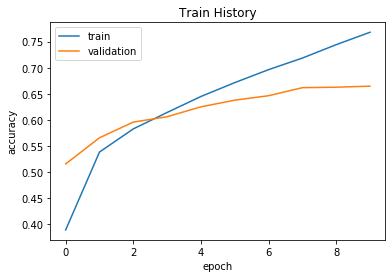

In [32]:
train_history(model_train,'accuracy','val_accuracy')

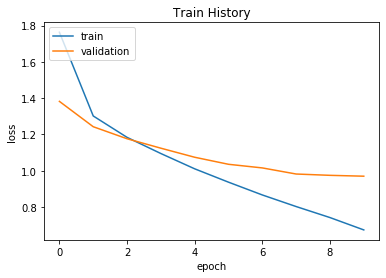

In [33]:
train_history(model_train,'loss','val_loss')

In [34]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)   #测试集测试

313/313 - 7s - loss: 0.9668 - accuracy: 0.6673


In [35]:
prediction = model.predict_classes(x_test_normalize)   #类别预测
print(prediction)

E:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3 8 8 ... 5 1 7]


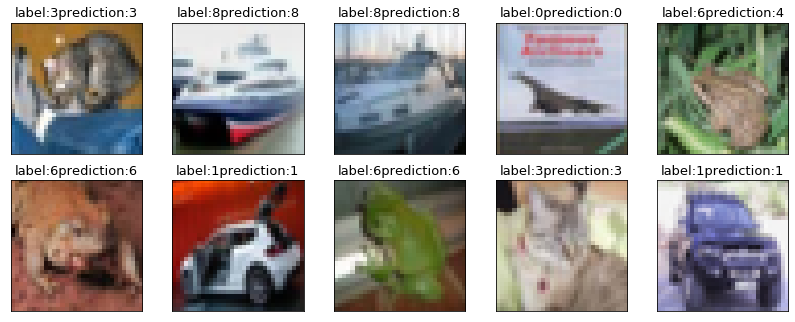

In [40]:
plot_image(x_test_image,y_test_label,prediction,0,10)

In [41]:
prediction_probability = model.predict(x_test_normalize)   #概率预测
print(prediction_probability[0])

[6.7727049e-03 5.7688070e-04 1.4737741e-02 7.3272806e-01 2.1863099e-02
 1.9450101e-01 2.3909786e-03 6.7202677e-03 1.8998398e-02 7.1084872e-04]


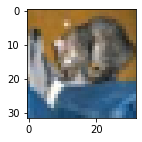

label: cat predict: cat
airplaneProbability:0.006772705
automobileProbability:0.000576881
birdProbability:0.014737741
catProbability:0.732728064
deerProbability:0.021863099
dogProbability:0.194501013
frogProbability:0.002390979
horseProbability:0.006720268
shipProbability:0.018998398
truckProbability:0.000710849


In [44]:
#数字与对应的类别
label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
def predicted_probability(x,y,prediction,prediction_probability,i):   #显示图像不同类别的预测概率
    plt.figure(figsize=(2,2))
    plt.imshow(x[i])
    plt.show()
    print("label:",label_dict[y[i][0]],'predict:',label_dict[prediction[i]])   #预测结果和真实标签
    for j in range(10):   #输出10个类别概率
        print(label_dict[j]+'Probability:%1.9f'%(prediction_probability[i][j]))

predicted_probability(x_test_image,y_test_label,prediction,prediction_probability,0)

In [46]:
pd.crosstab(y_test_label.reshape(-1),prediction,rownames=['label'],colnames=['prediction'])  

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,719,23,54,15,20,14,8,21,98,28
1,21,808,14,12,4,6,5,7,43,80
2,74,10,546,45,108,80,58,47,23,9
3,15,12,90,440,110,197,66,40,20,10
4,25,5,112,40,652,30,36,83,13,4
5,12,2,87,135,74,595,22,60,10,3
6,9,9,73,69,91,38,683,16,9,3
7,13,6,39,37,70,59,3,764,3,6
8,64,49,13,10,6,11,10,9,807,21
